# Installing necessary Libraries

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

# imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# testing csv files

In [5]:
customers = pd.read_csv('./Customers.csv')
products = pd.read_csv('./Products.csv')
transactions = pd.read_csv('./Transactions.csv')

print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

# Check for missing values

In [6]:
print(customers.info())
print(products.info())
print(transactions.info())

print(customers.describe(include='all'))
print(products.describe(include='all'))
print(transactions.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

# Visualize Missing Data

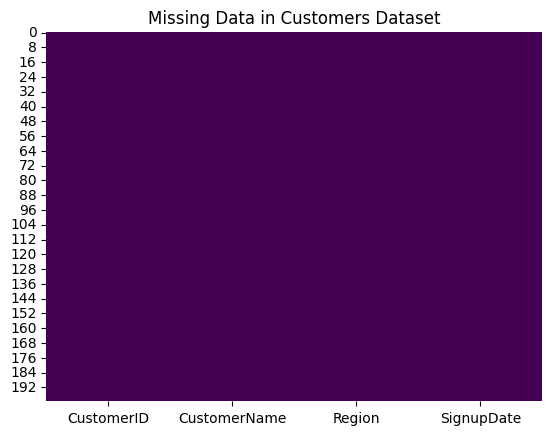

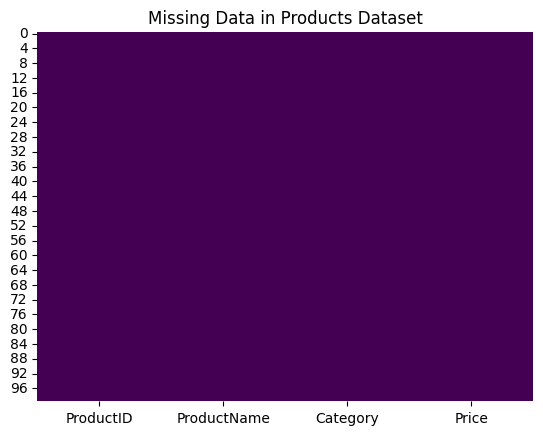

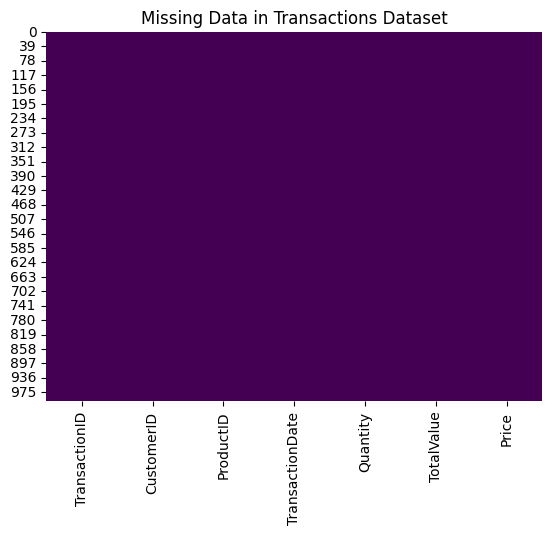

In [7]:
sns.heatmap(customers.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data in Customers Dataset')
plt.show()
sns.heatmap(products.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data in Products Dataset')
plt.show()
sns.heatmap(transactions.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data in Transactions Dataset')
plt.show()

# Relationships Between Datasets

In [8]:
merged_df = transactions.merge(customers, on='CustomerID', how='left')
merged_df = merged_df.merge(products, on='ProductID', how='left')
print(merged_df.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

# Basic Visualizations

## Top 10 most purchased products

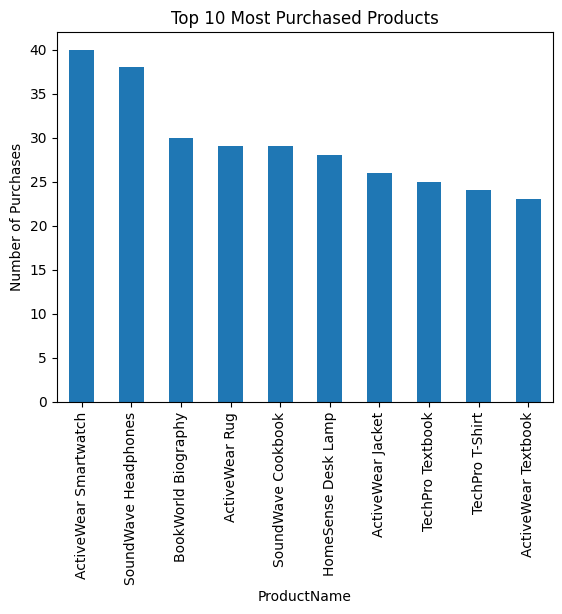

In [9]:
top_products = merged_df['ProductName'].value_counts().head(10)
top_products.plot(kind='bar', title='Top 10 Most Purchased Products')
plt.ylabel('Number of Purchases')
plt.show()


## Customer distribution by region

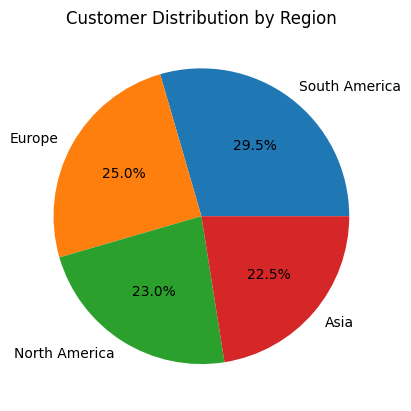

In [10]:
region_distribution = customers['Region'].value_counts()
region_distribution.plot(kind='pie', autopct='%1.1f%%', title='Customer Distribution by Region')
plt.ylabel('')
plt.show()


## Sales trends over time

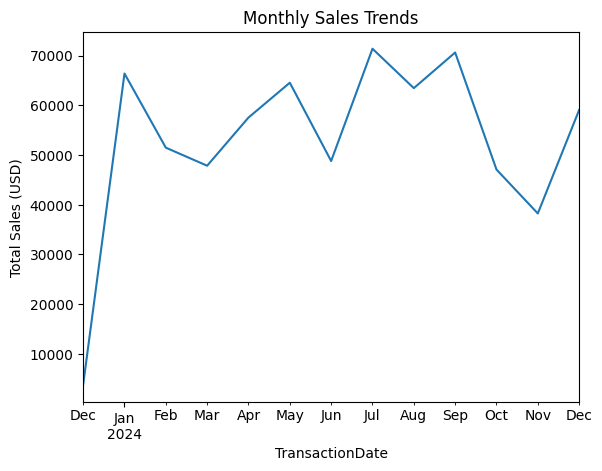

In [11]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
sales_trends = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_trends.plot(kind='line', title='Monthly Sales Trends')
plt.ylabel('Total Sales (USD)')
plt.show()

# Lookalike Model

## Prepare the Data

In [12]:
merged_df = transactions.merge(customers, on='CustomerID', how='left')
merged_df = merged_df.merge(products, on='ProductID', how='left')


## feature set for each customer

In [13]:
customer_features = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Category': lambda x: x.mode()[0]  # Most frequent category
}).rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'NumTransactions',
    'Category': 'PreferredCategory'
}).reset_index()
print(customer_features.head())


  CustomerID  TotalSpending  NumTransactions PreferredCategory
0      C0001        3354.52                5       Electronics
1      C0002        1862.74                4          Clothing
2      C0003        2725.38                4        Home Decor
3      C0004        5354.88                8             Books
4      C0005        2034.24                3       Electronics


## Encode Categorical Data

### Encode the PreferredCategory column using one-hot encoding

In [14]:
customer_features = pd.get_dummies(customer_features, columns=['PreferredCategory'])

## Calculate Similarity:


### cosine similarity to find similar customers

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(customer_features.iloc[:, 1:])  # Exclude CustomerID
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=customer_features['CustomerID'],
    columns=customer_features['CustomerID']
)
print(similarity_df.head())


CustomerID  C0001  C0002  C0003  C0004  C0005     C0006     C0007     C0008  \
CustomerID                                                                    
C0001         1.0    1.0    1.0    1.0    1.0  1.000000  1.000000  1.000000   
C0002         1.0    1.0    1.0    1.0    1.0  0.999999  0.999999  1.000000   
C0003         1.0    1.0    1.0    1.0    1.0  1.000000  1.000000  1.000000   
C0004         1.0    1.0    1.0    1.0    1.0  1.000000  1.000000  1.000000   
C0005         1.0    1.0    1.0    1.0    1.0  1.000000  1.000000  0.999999   

CustomerID     C0009     C0010  ...  C0191  C0192     C0193  C0194  C0195  \
CustomerID                      ...                                         
C0001       0.999998  0.999999  ...    1.0    1.0  1.000000    1.0    1.0   
C0002       0.999999  1.000000  ...    1.0    1.0  0.999999    1.0    1.0   
C0003       0.999998  0.999999  ...    1.0    1.0  1.000000    1.0    1.0   
C0004       0.999998  0.999999  ...    1.0    1.0  1.000000  

## Top 3 Similar Customers

### For each of the first 20 customers (C0001 to C0020)

In [16]:
lookalike_map = {}

for customer in customer_features['CustomerID'][:20]:
    similar_customers = similarity_df[customer].sort_values(ascending=False).iloc[1:4]
    lookalike_map[customer] = list(zip(similar_customers.index, similar_customers.values))

print(lookalike_map)


{'C0001': [('C0039', 0.9999999952285652), ('C0035', 0.9999999945678594), ('C0146', 0.999999993731339)], 'C0002': [('C0029', 0.9999999954613772), ('C0103', 0.9999999846113045), ('C0010', 0.9999999824949058)], 'C0003': [('C0178', 0.9999999999572835), ('C0152', 0.9999999973975879), ('C0159', 0.999999993115422)], 'C0004': [('C0021', 0.9999999998367862), ('C0075', 0.9999999988734848), ('C0101', 0.9999999985853775)], 'C0005': [('C0112', 0.9999999982426493), ('C0197', 0.9999999963783862), ('C0035', 0.9999999919482886)], 'C0006': [('C0117', 0.9999999988358368), ('C0171', 0.9999999987827094), ('C0044', 0.999999997180717)], 'C0007': [('C0120', 0.9999999985154543), ('C0026', 0.9999999937558456), ('C0140', 0.9999999845489194)], 'C0008': [('C0076', 0.9999999614936271), ('C0139', 0.9999999197663533), ('C0047', 0.9999999071628308)], 'C0009': [('C0077', 0.9999999689015278), ('C0049', 0.999999760463356), ('C0111', 0.9999994850024262)], 'C0010': [('C0029', 0.9999999957831188), ('C0088', 0.99999999343126

## Save the Lookalike Map:

### results to a CSV file

In [17]:
import csv

with open('FirstName_LastName_Lookalike.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['CustomerID', 'Lookalikes'])
    for key, value in lookalike_map.items():
        writer.writerow([key, value])


# Customer Segmentation / Clustering

## Prepare the Data

### Use the customer_features DataFrame from the previous step

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])  # Exclude CustomerID


## Apply Clustering

### KMeans clustering

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Test for different cluster numbers
db_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    db_score = davies_bouldin_score(scaled_features, clusters)
    db_scores.append((n_clusters, db_score))

# Find the optimal number of clusters
optimal_clusters = min(db_scores, key=lambda x: x[1])
print(f"Optimal Clusters: {optimal_clusters[0]}, DB Index: {optimal_clusters[1]}")


Optimal Clusters: 5, DB Index: 0.7040079101394886


## Train Final Model

### Train the KMeans model with the optimal number of clusters

In [20]:
final_kmeans = KMeans(n_clusters=optimal_clusters[0], random_state=42)
customer_features['Cluster'] = final_kmeans.fit_predict(scaled_features)

## Visualize the Clusters

### PCA for dimensionality reduction and visualize clusters

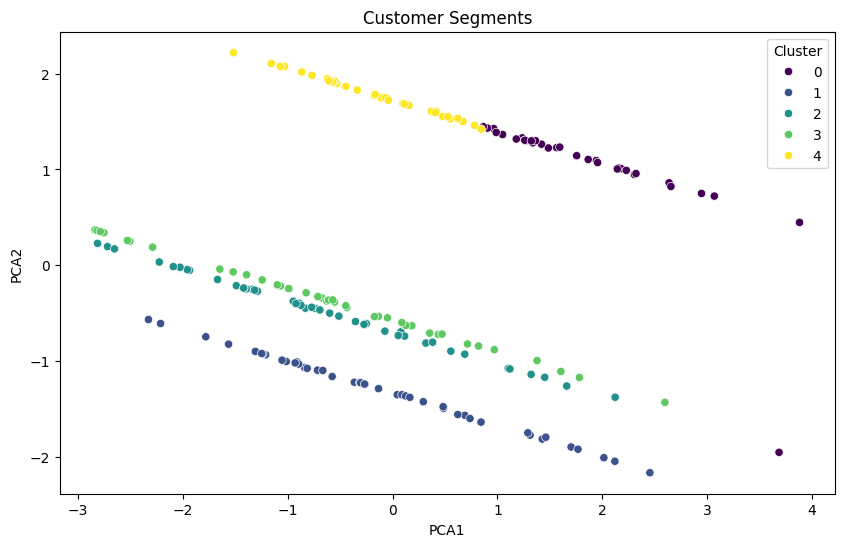

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_features['PCA1'] = reduced_features[:, 0]
customer_features['PCA2'] = reduced_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='viridis'
)
plt.title('Customer Segments')
plt.show()


## Save the Results

In [22]:
customer_features[['CustomerID', 'Cluster']].to_csv('FirstName_LastName_Clustering.csv', index=False)
